In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


EDA

In [3]:
# load dataset

data = pd.read_excel('glass.xlsx',sheet_name='glass')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
cols = data.columns

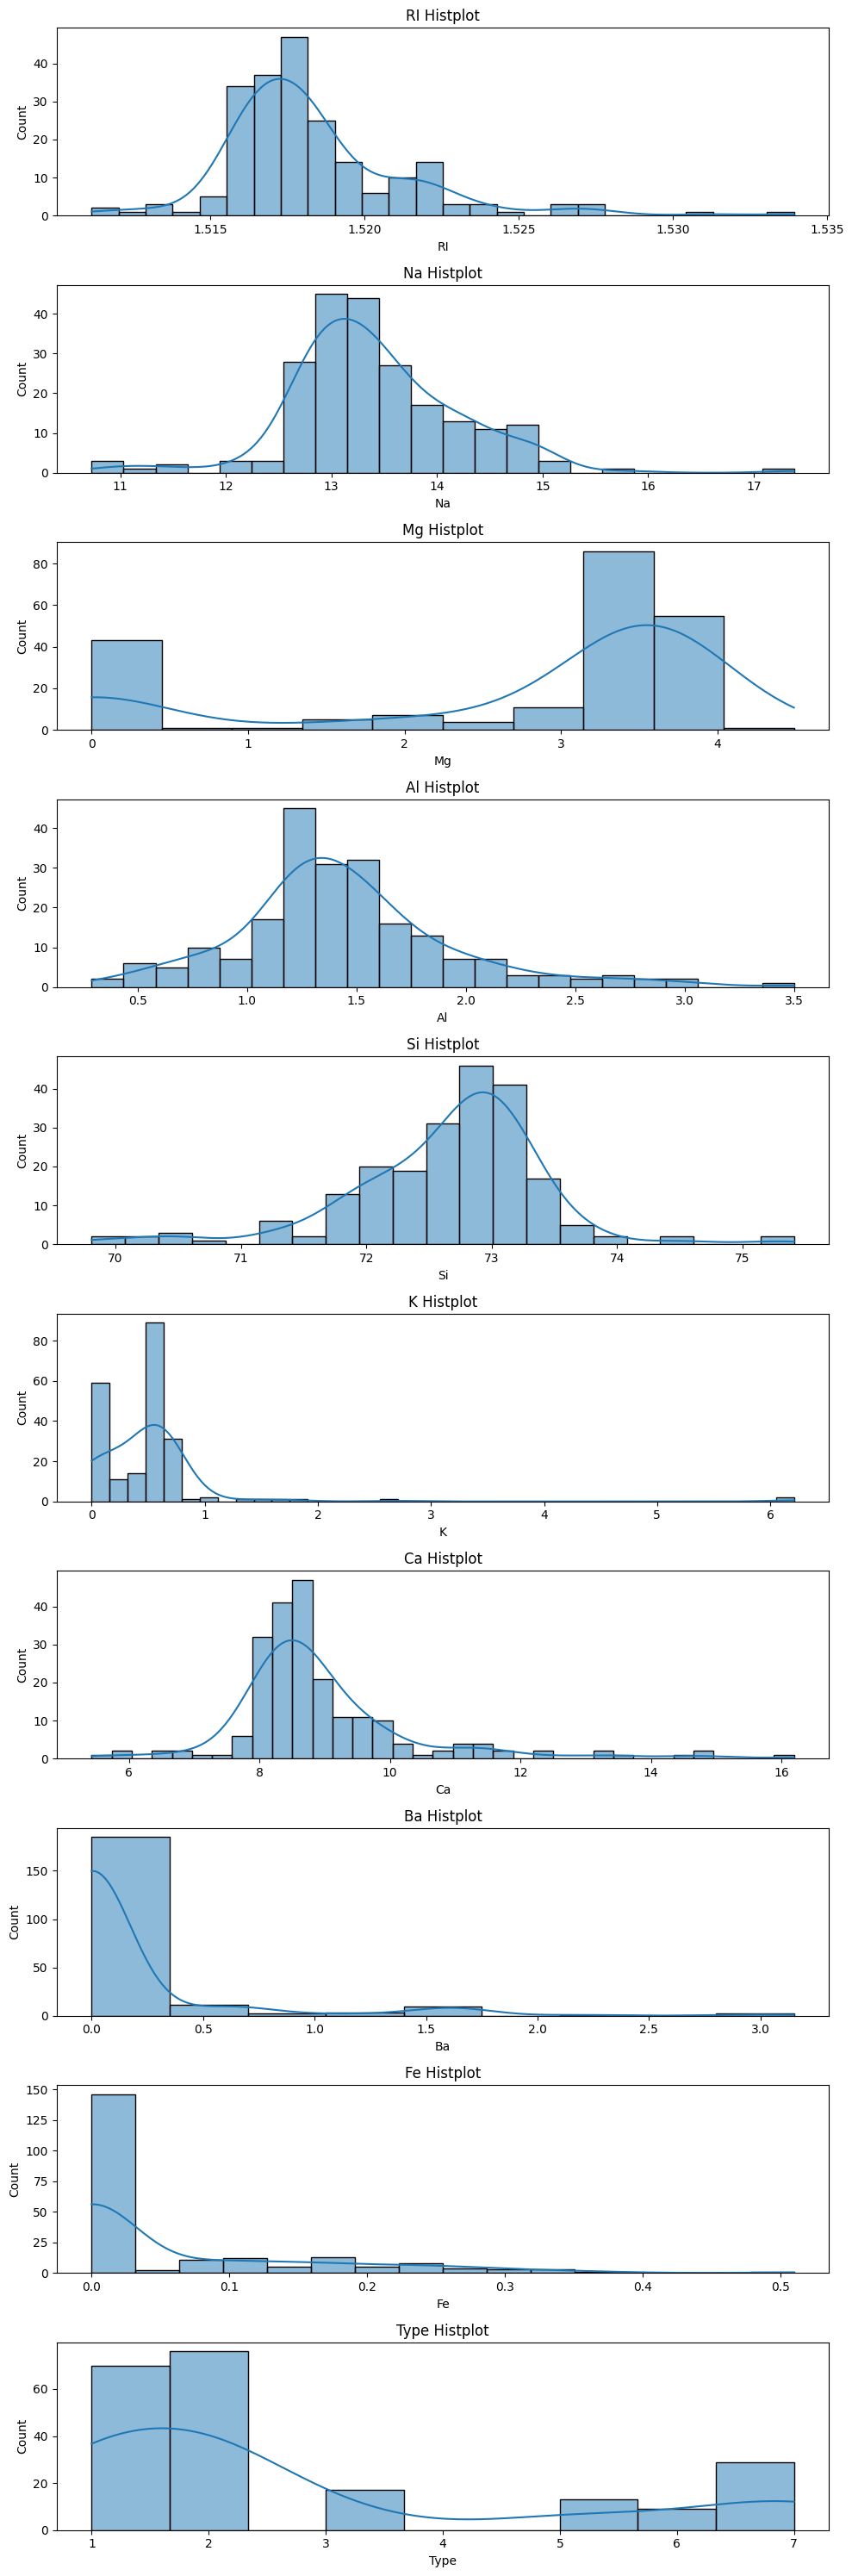

In [10]:
# Data Visualization
# Plotting Histogram for all features

plt.figure(figsize=(10,len(cols)*3))
for i,fe in enumerate(cols,1):
    plt.subplot(len(cols),1,i)
    sn.histplot(data=data, x=fe, kde=True, palette='viridis')
    plt.title(f'{fe} Histplot')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

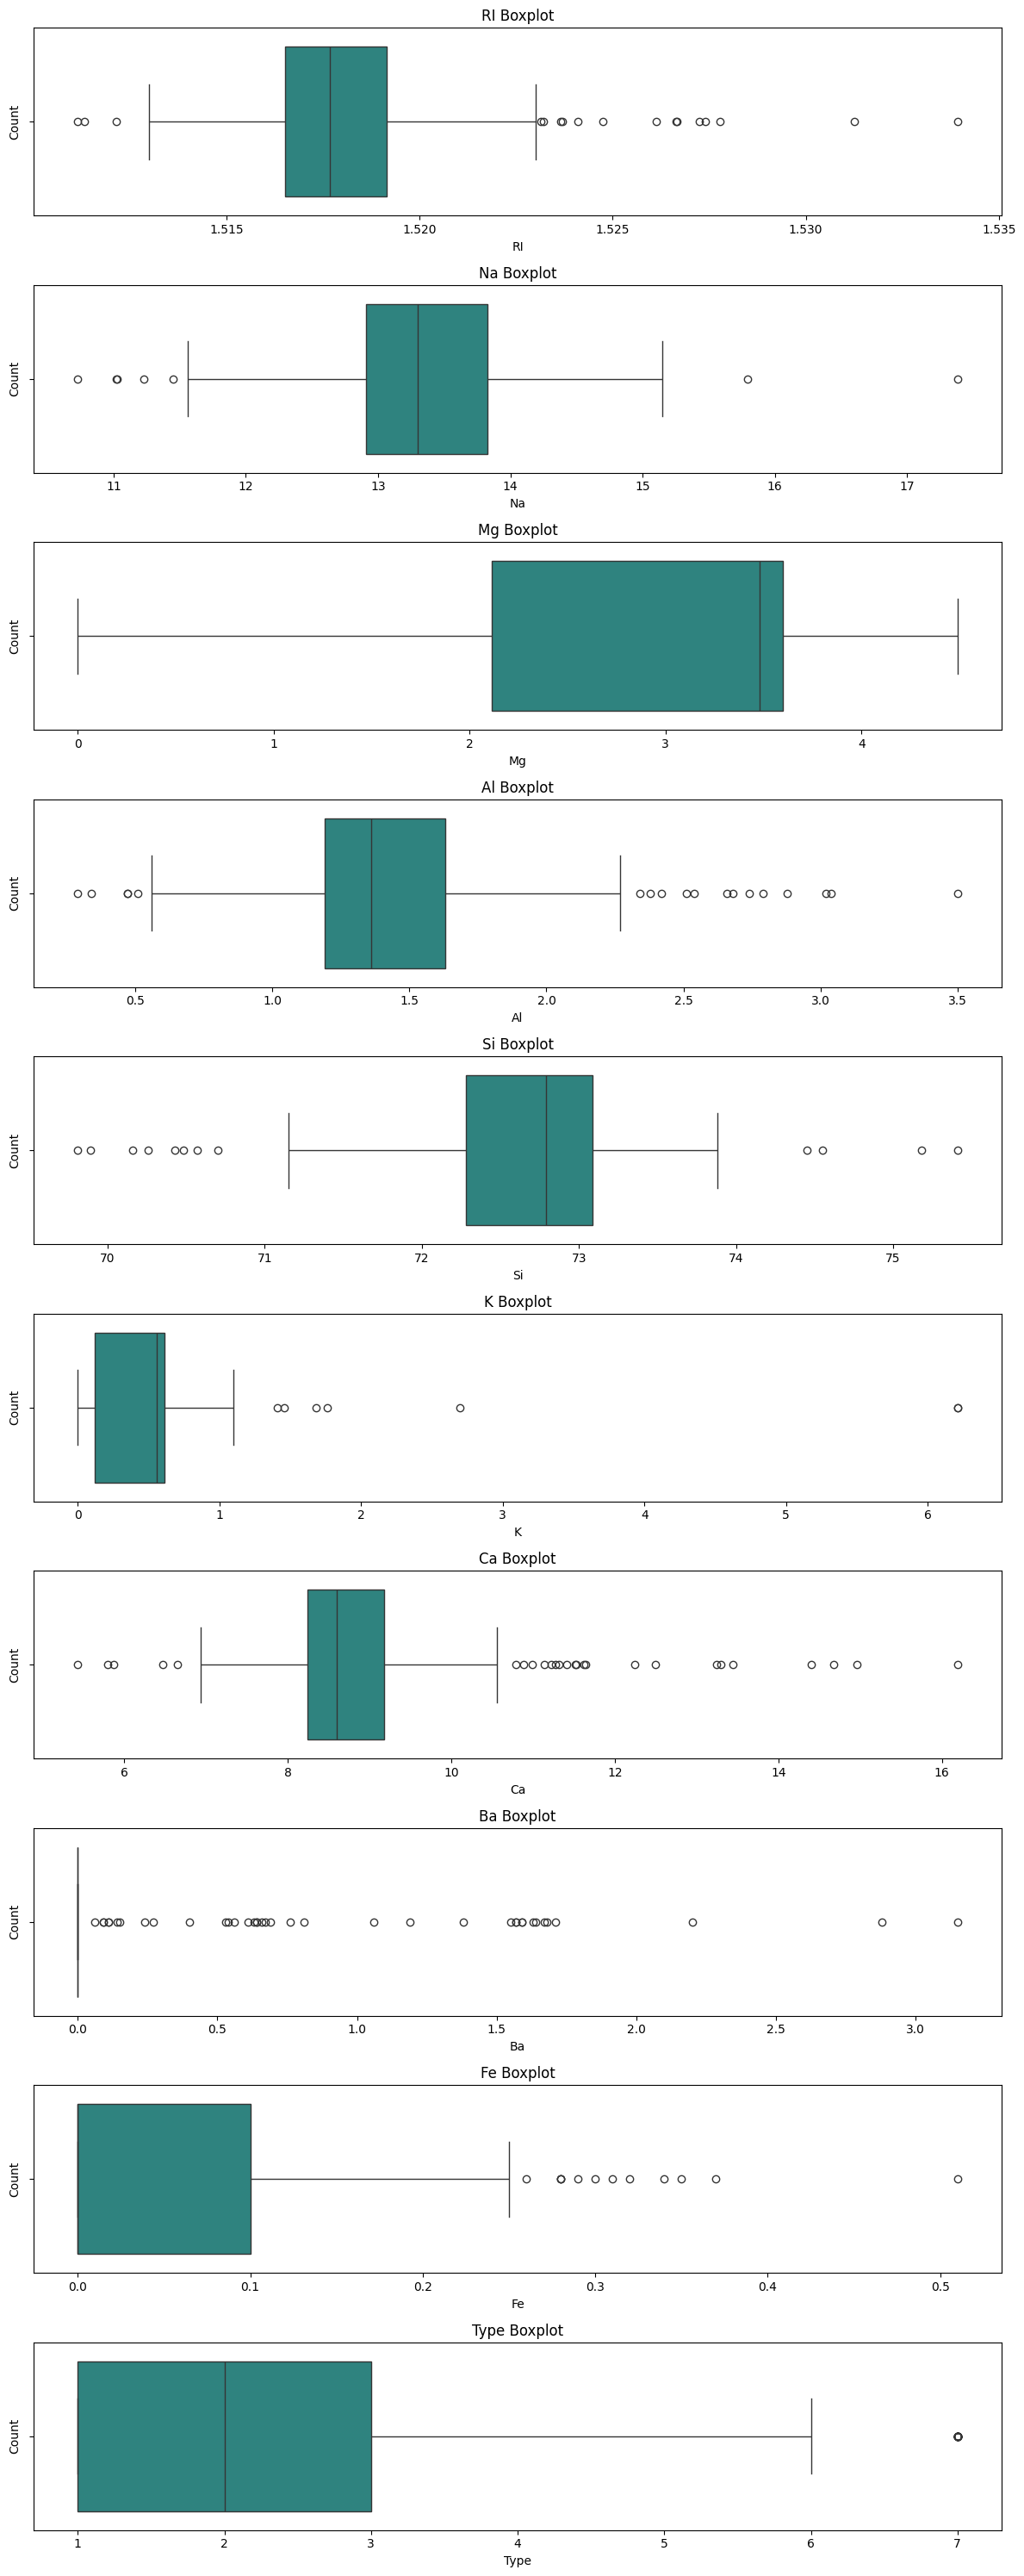

In [12]:
# Plotting boxplots for all the features

plt.figure(figsize=(12,len(cols)*3))
for i,fe in enumerate(cols,1):
    plt.subplot(len(cols),1,i)
    sn.boxplot(data=data, x=fe, palette='viridis')
    plt.title(f'{fe} Boxplot')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

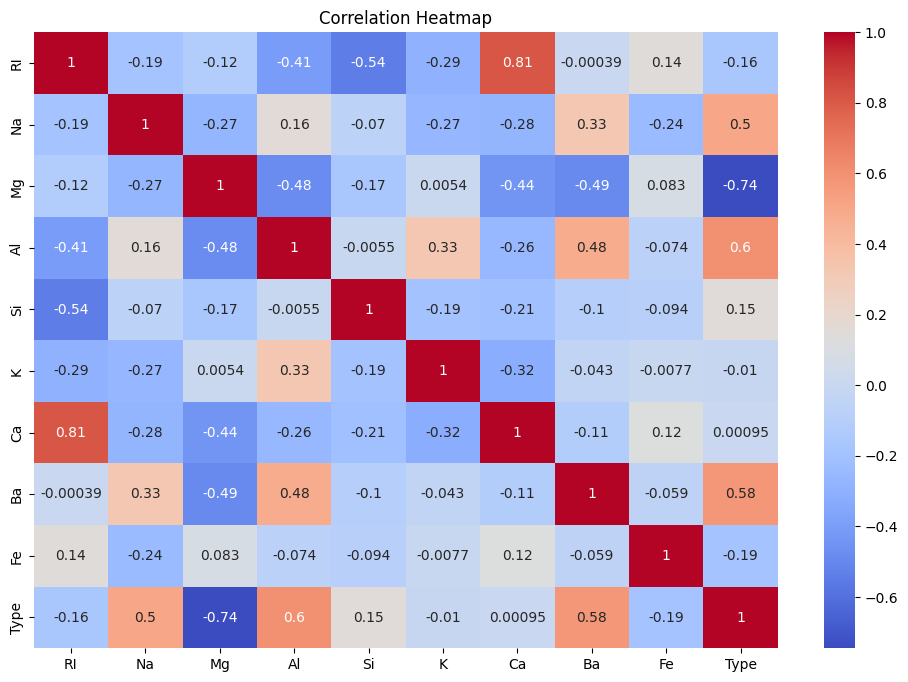

In [13]:
# Correlation heatmap

plt.figure(figsize=(12,8))
sn.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

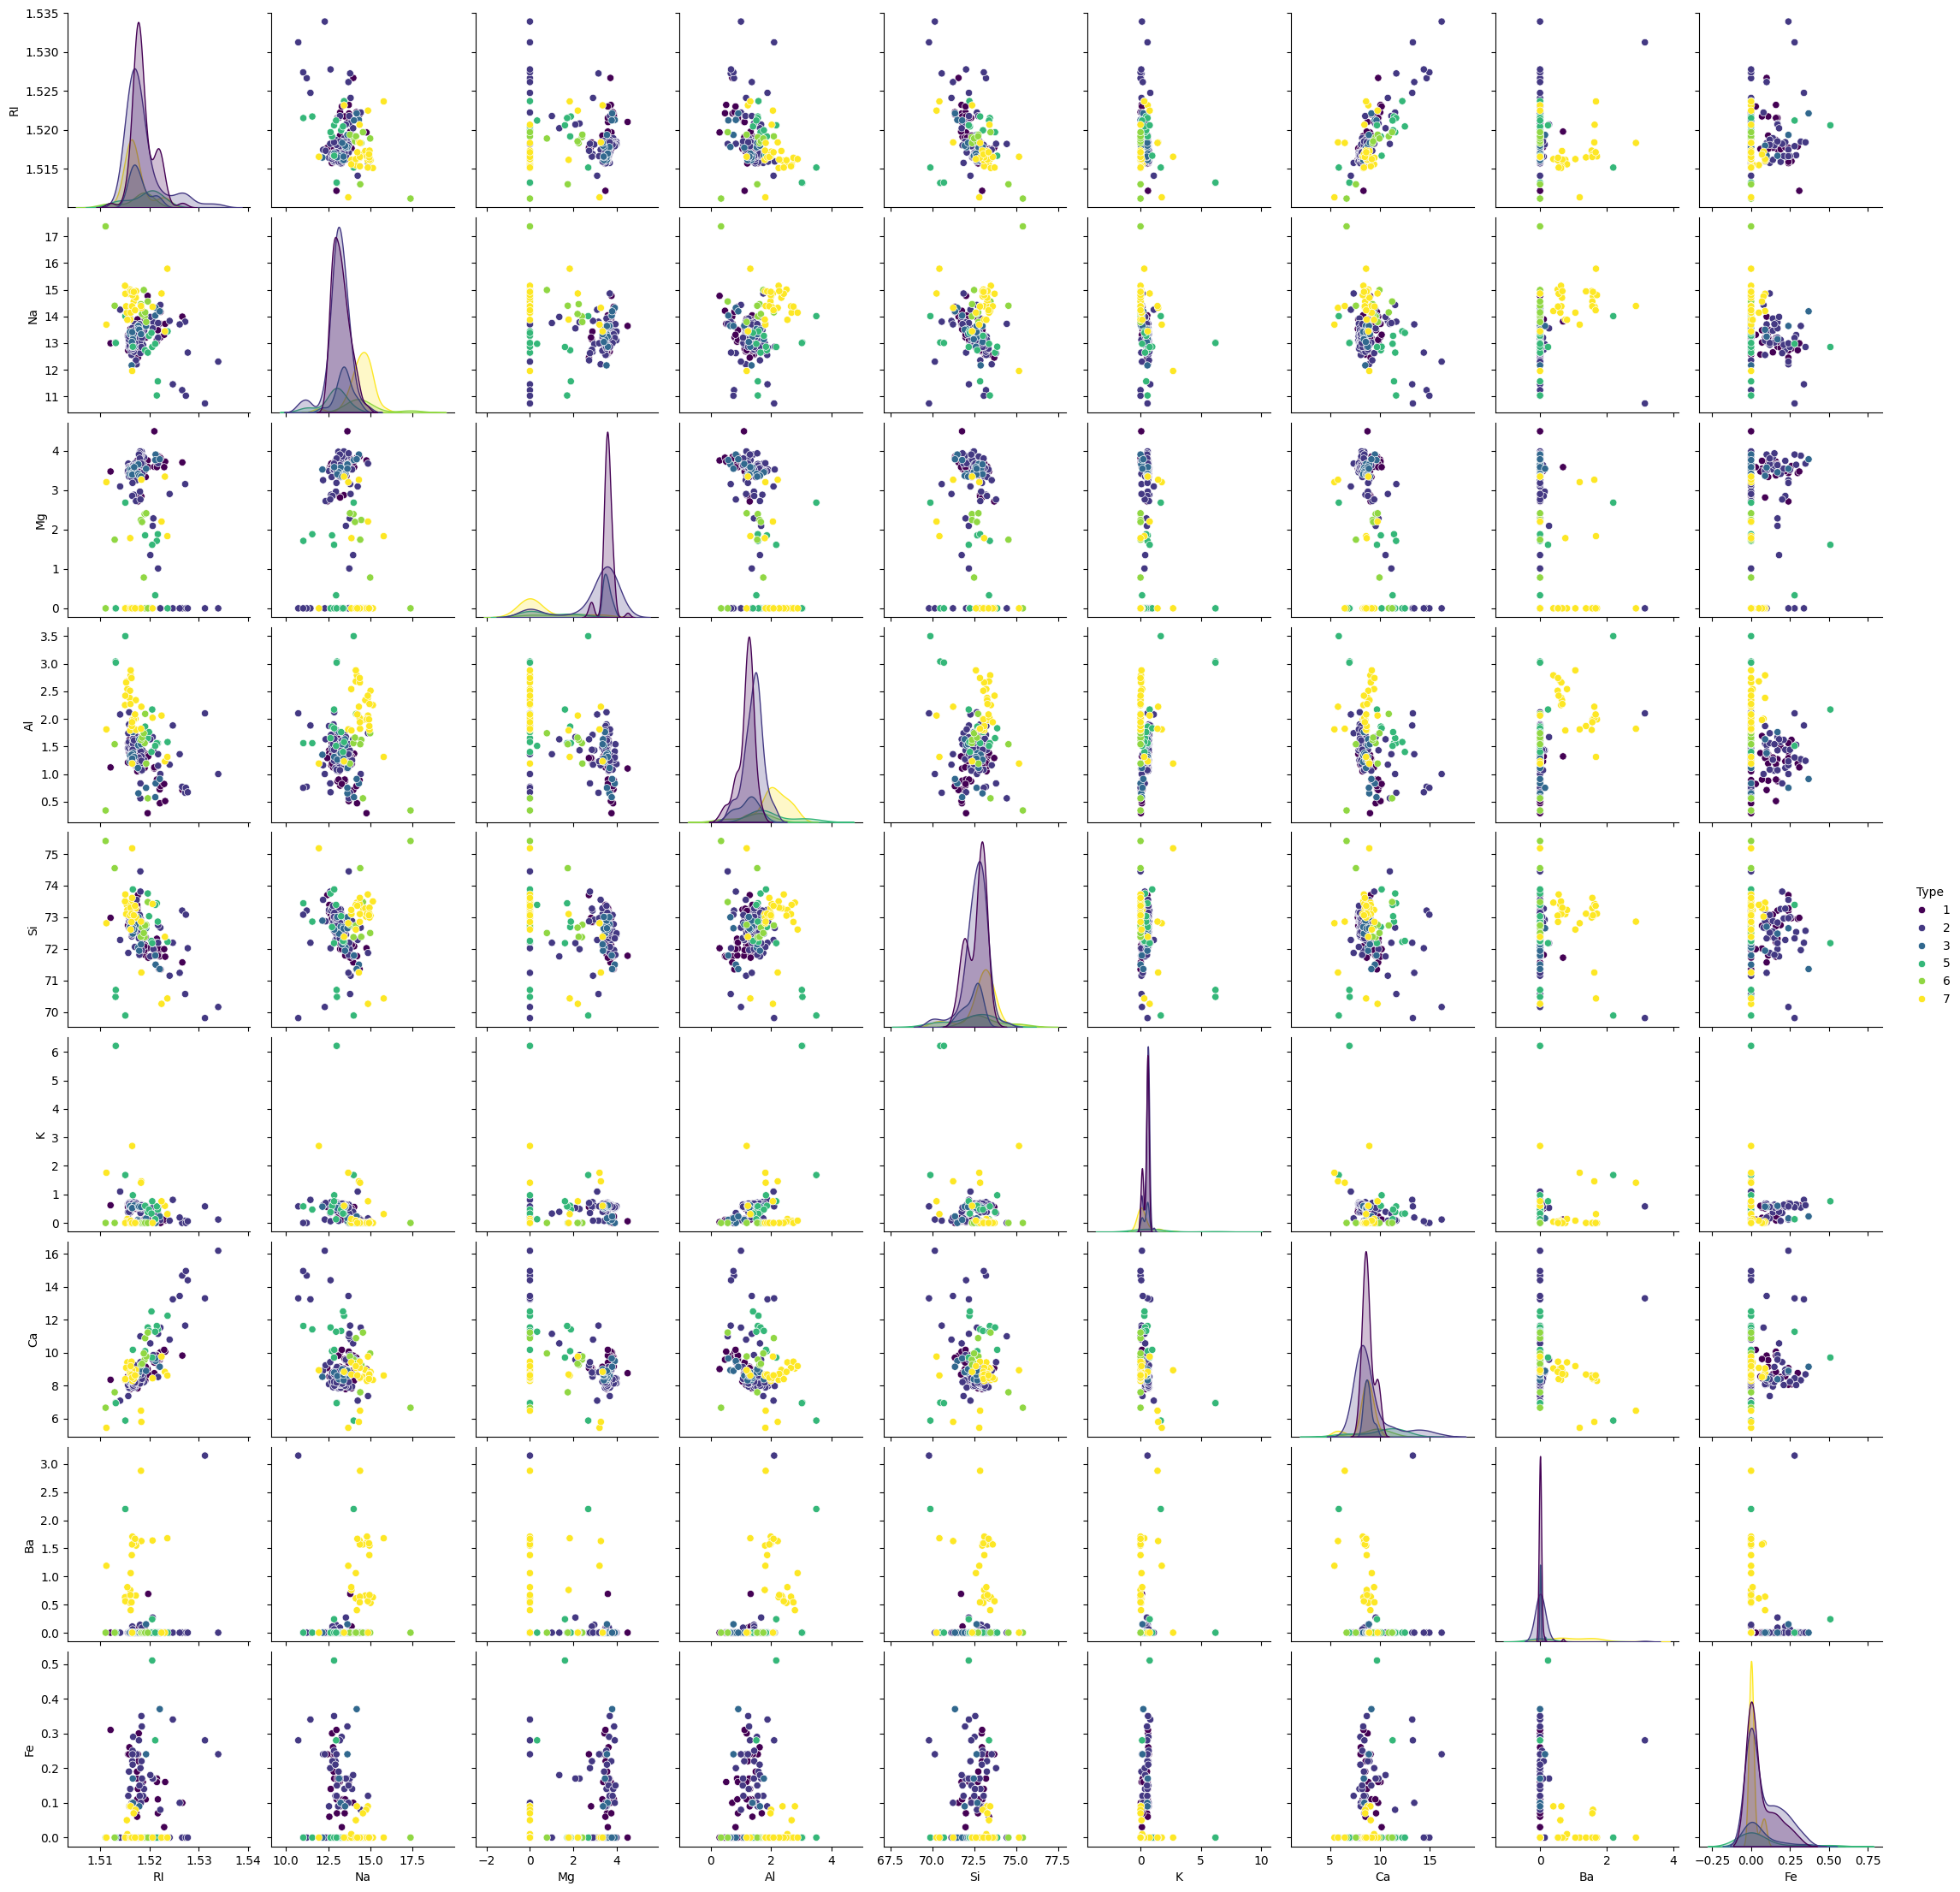

In [16]:
# pairplot of features

sn.pairplot(data, hue='Type', palette='viridis')
plt.show()

Data Preprocessing

In [17]:
X = data.drop('Type', axis=1)
y = data['Type']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Model Implementation

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier(criterion='gini', max_depth = 10,min_samples_split=10, random_state=42)

In [23]:
# Fitting model

model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [24]:
# Feature importance

model.feature_importances_

array([0.12968381, 0.10937876, 0.17455816, 0.17664303, 0.08302494,
       0.07887448, 0.13280975, 0.07664078, 0.03838629])

In [25]:
# Make prediction on test data

y_pred = model.predict(X_test)

In [26]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1])

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
# Confusion matrix for Random Forest model

confusion_matrix(y_test,y_pred)

array([[11,  0,  0,  0,  0,  0],
       [ 3, 10,  0,  0,  0,  1],
       [ 1,  1,  1,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  8]])

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
# Calculating accuracy score

accuracy_score(y_test,y_pred)

0.813953488372093

In [31]:
from sklearn.model_selection import cross_val_score

In [35]:
# Cross validation for random forest model

cross_val_score(model, X_train, y_train, cv=5)

array([0.68571429, 0.61764706, 0.76470588, 0.73529412, 0.73529412])

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.77      0.71      0.74        14
           3       1.00      0.33      0.50         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.81        43
   macro avg       0.90      0.76      0.78        43
weighted avg       0.84      0.81      0.80        43



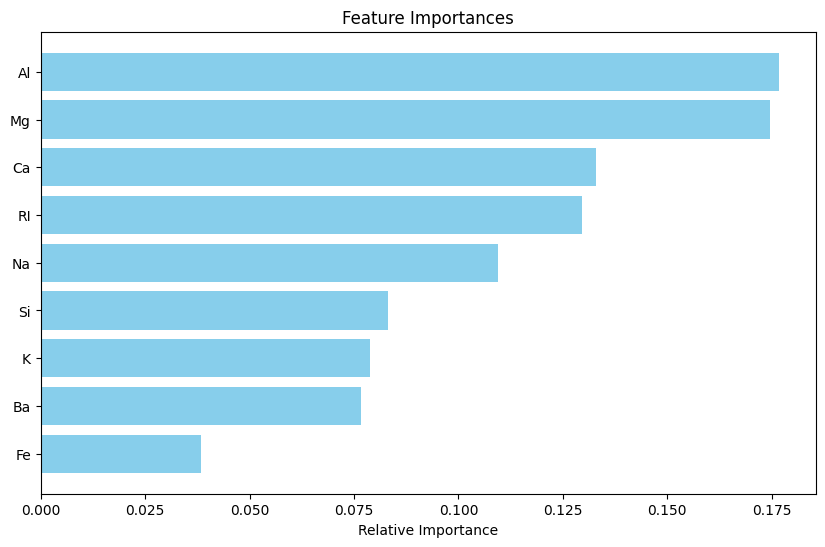

In [38]:
# Plotting feature importance for Random Forest Model

features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
model_entropy = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10, random_state=42)

In [41]:
model_entropy.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)

In [42]:
model_entropy.feature_importances_

array([0.11213684, 0.10687959, 0.2709567 , 0.17463021, 0.06203748,
       0.07268323, 0.11227076, 0.06161146, 0.02679372])

In [43]:
pred = model_entropy.predict(X_test)

In [44]:
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 7, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1])

In [45]:
confusion_matrix(y_test,pred)

array([[11,  0,  0,  0,  0,  0],
       [ 4,  9,  0,  0,  0,  1],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0,  8]])

In [46]:
accuracy_score(y_test,pred)

0.7674418604651163

In [47]:
cross_val_score(model_entropy, X_train, y_train, cv=5)

array([0.65714286, 0.67647059, 0.76470588, 0.76470588, 0.67647059])

In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.65      1.00      0.79        11
           2       0.82      0.64      0.72        14
           3       1.00      0.33      0.50         3
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

    accuracy                           0.77        43
   macro avg       0.88      0.69      0.73        43
weighted avg       0.81      0.77      0.75        43



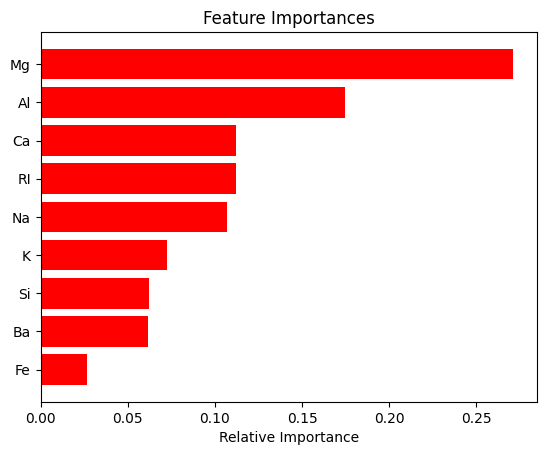

In [51]:
# Plotting feature importance for Random Forest model
features=data.columns
importances=model_entropy.feature_importances_
indices=np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The model using the 'gini' criterion achieved a higher accuracy (81.39%) compared to the 'entropy' criterion (74.42%).

Precision, recall, and f1-scores are slightly better with the gini criterion, especially for more challenging classes (like class 3).

Bagging Method with Random Forest

In [52]:
from sklearn.ensemble import BaggingClassifier

In [54]:
bagging = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42) # using  estimator instead of base_estimator
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

In [56]:
# Predict and evaluate for Bagging

y_pred_bagging = bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test,y_pred_bagging)
print(f'Accuracy with Bagging Method :{accuracy_bagging}')

Accuracy with Bagging Method :0.8604651162790697


Boosting with Adaboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
adaboost = AdaBoostClassifier(n_estimators=10, random_state=42)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [59]:
y_pred_boosting = adaboost.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print(f'Accuracy with Bossting Method : {accuracy_boosting}')

Accuracy with Bossting Method : 0.4883720930232558


In [62]:
print('Comparing Bagging and Boosting Method Accuracies :')
print(f'Bagging Method Accuracy : {accuracy_bagging}')
print(f'Boosting Method Accuracy : {accuracy_boosting}')

Comparing Bagging and Boosting Method Accuracies :
Bagging Method Accuracy : 0.8604651162790697
Boosting Method Accuracy : 0.4883720930232558


** 1) Explain Bagging and Boosting methods. How is it different from each other.**

# Bagging

Bagging aims to reduce variance and improve the stability of machine learning algorithms, particularly decision trees. Each subset is used to train a separate model.

# Boosting

Boosting focuses on reducing bias by sequentially training models where each new model attempts to correct the errors made by the previous ones. It emphasizes misclassified instances by adjusting their weights.

# Key Differences :

* Independence vs. Sequential Dependency: Bagging trains models independently, while Boosting trains models sequentially.
* Focus: Bagging reduces variance, Boosting reduces bias.
* Risk: Bagging has a lower risk of overfitting, whereas Boosting can overfit if not controlled.
* Examples: Bagging includes Random Forests, while Boosting includes AdaBoost and Gradient Boosting.





**2) Explain how to handle imbalance in the data.**

 Handling imbalanced data is crucial when building machine learning models, especially for classification tasks, because most algorithms assume a relatively even distribution across classes. When one class significantly outnumbers the others, it can lead to biased predictions and poor model performance, particularly on the minority class.

- Here are several techniques to handle imbalance in the data
  * Resampling Techniques
  * Use of Different Evaluation Metrics
  * Cost-Sensitive Learning
  * Ensemble Methods
  * Data Augmentation
  * K-Fold Cross-Validation
  * Algorithm Selection

